In [2]:
!pip install matplotlib --upgrade

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


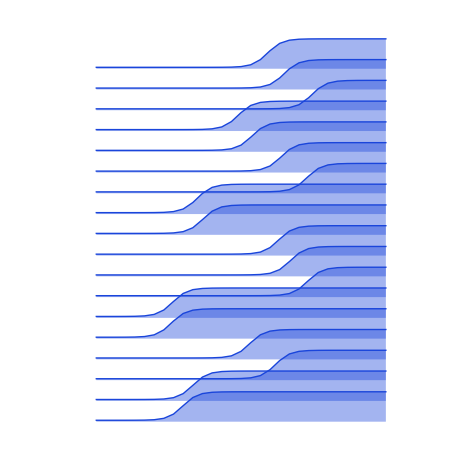

In [148]:
import math

import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return (1 / (1 + np.exp(-x))) +.05

gamma = np.vectorize(math.gamma)
N = 31
x = np.linspace(-10, 10, N)
heights = 10*(np.random.uniform(size=18)-.5)

ax = plt.figure().add_subplot(projection='3d')
ax.set_proj_type('ortho')
ax.view_init(elev=35, azim=-90, roll=0)
ax.axis("off")
facecolors = plt.colormaps['viridis_r'](np.linspace(0, 1, len(heights)))

COLOR = [0.1, 0.27, 0.86]

for i, h in enumerate(heights):
    # Note fill_between can take coordinates as length N vectors, or scalars
    ax.fill_between(x, i, .8*sigmoid(2*(x-h)) ,
                    x, i, 0,
                    facecolors=COLOR, alpha=.4)
    ax.plot(x,i,.8*sigmoid(2*(x-h)),c=COLOR,linewidth=1)

ax.set(xlim=(-10, 10), ylim=(1, 9), zlim=(0, 5),
       xlabel='x', ylabel=r'$\lambda$', zlabel='probability')


plt.tight_layout()
# plt.savefig("curves.svg")
# plt.show()

/tmp/ipykernel_20257/1126730515.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs.scatter(.05*latent[:,0],.3*latent[:,1],s=7,c=COLOR)


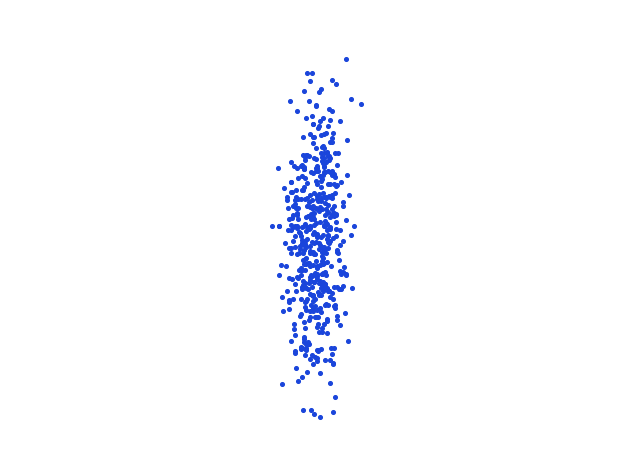

In [4]:
import numpy as np
latent = np.random.normal(size=(500,2))


fig, axs = plt.subplots(ncols=1, nrows=1)
axs.set_xlim([-1,1])
axs.set_ylim([-1,1])
axs.scatter(.05*latent[:,0],.3*latent[:,1],s=7,c=COLOR)
axs.axis("off")
fig.tight_layout()

fig.savefig("latent.svg")

In [ ]:
# filename = "./figures/partialpointcloud.png"

In [75]:

heights_all =  np.load("./results/heights.npy").T

In [76]:
heights_all.shape

(16, 2048)

In [77]:
heights_all.max()

0.37334234

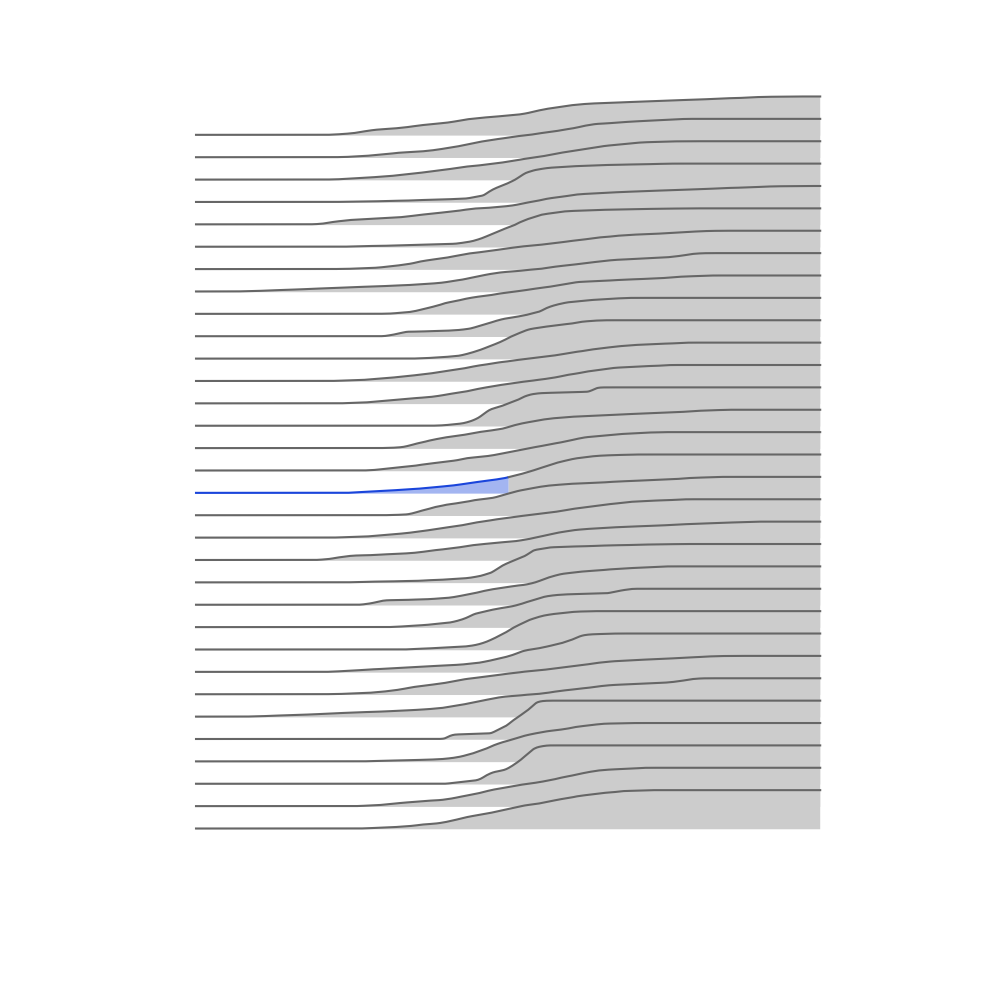

In [172]:
import math

import matplotlib.pyplot as plt
import numpy as np

heights_all =  np.load("./results/heights.npy").T

def sigmoid(x,h):
    out = np.zeros_like(x)
    # print(h.shape)
    for h_sub in h: 
        out += (1 / (1 + np.exp(-500*(x-h_sub))))
    
    return .5* (out / out.max())+.01

N = 512
x = np.linspace(-.5, .5, N)
heights = heights_all
# heights = 10*(np.random.uniform(size=18)-.5)

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
ax.set_proj_type('ortho')
ax.view_init(elev=35, azim=-90, roll=0)
ax.axis("off")
facecolors = plt.colormaps['viridis_r'](np.linspace(0, 1, len(heights)))

beta = .4
BLUE = np.array([0.1, 0.27, 0.86])
FILL_BLUE = np.array([0.1, 0.27, 0.86])*beta + (1-beta) * np.array([1, 1, 1])
GRAY_FILL = [0.8,.8,.8]
GRAY = [0.4,.4,.4]

ect = []
for i, h in enumerate(heights):
    # print(i)
    # Note fill_between can take coordinates as length N vectors, or scalars
    ect.append(sigmoid(x,h))
    i = len(heights) - i
    if i == 16:
        H = 256
        ax.fill_between(x[:H+1], i/2, sigmoid(x,h)[:H+1],x[:H+1], i/2, 0, facecolors=FILL_BLUE, alpha=1,zorder=0)
        ax.plot(x[:H],i/2,sigmoid(x,h)[:H],c=BLUE,linewidth=1.5,zorder=50)
        
        ax.fill_between(x[H:], i/2, sigmoid(x,h)[H:],x[H:], i/2, 0, facecolors=GRAY_FILL, alpha=1,zorder=0)
        ax.plot(x[H:],i/2,sigmoid(x,h)[H:],c=GRAY,linewidth=1.5,zorder=50)
    else: 
        ax.fill_between(x, i/2, sigmoid(x,h),x, i/2, 0, facecolors=GRAY_FILL, alpha=1,zorder=0)
        ax.plot(x,i/2,sigmoid(x,h),c=GRAY,linewidth=1.5,zorder=50)


ax.set(xlim=(-.5,.5), ylim=(0, 8), zlim=(0, 5))#,
#    xlabel='x', ylabel=r'$\lambda$', zlabel='probability')
# ax.axis("off")

plt.tight_layout()
plt.savefig("make_ecc_curves.svg")
# plt.show()

In [183]:
ect_mat = np.vstack(ect)
ect_mat.max()

0.51

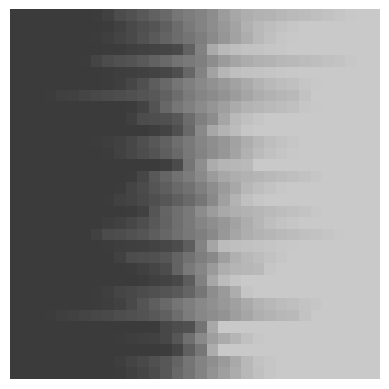

In [196]:
plt.imshow(ect_mat[:,::16],cmap="gray",vmin=-.2,vmax=.7)
plt.axis("off")
plt.savefig("ect_grays.svg")


In [207]:
print(ect_mat.min(),ect_mat.max())

0.01 0.51


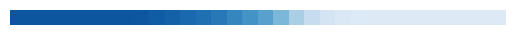

In [220]:

plt.imshow(-1*ect_mat[16,::16].reshape(1,32),cmap="Blues",vmin=-.6,vmax=0.09)
plt.axis("off")
plt.savefig("ect_blues.svg")
